<a href="https://colab.research.google.com/github/Khalid019/Titanic_Survival_Classification_Using_Machine-Learning/blob/main/Titanic_Survival.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Loading the Titanic Dataset

In [2]:
data = pd.read_csv("drive/MyDrive/Sample_Data/titanic/train.csv", index_col='PassengerId')
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


# Pre-Processing- EDA, Feature eng. and scaling, selection

In [3]:
df = data.copy()

understand the dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


Drop columns

In [5]:
# Drop duplicates and columns
df.drop_duplicates(inplace=True)
df.drop(columns=['Cabin', 'Name'], inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 69.6+ KB


In [7]:
tmp = df.select_dtypes('object')
tmp.head()

,Sex,Ticket,Embarked
PassengerId,,,
1,male,A/5 21171,S
2,female,PC 17599,C
3,female,STON/O2. 3101282,S
4,female,113803,S
5,male,373450,S


In [8]:
tmp['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [9]:
# there is too many category
tmp['Ticket'].value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

In [10]:
df.drop(columns=['Ticket',], inplace=True)

In [11]:
# check Embarked column
tmp['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [12]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.6+ KB


# Type conversion

In [14]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S


In [15]:
df.select_dtypes('object').columns

Index(['Sex', 'Embarked'], dtype='object')

In [16]:
df.Sex.astype('category').cat.codes

PassengerId
1      1
2      0
3      0
4      0
5      1
      ..
887    1
888    0
889    0
890    1
891    1
Length: 891, dtype: int8

In [17]:
for objcol in df.select_dtypes('object').columns:
     df[objcol] = df[objcol].astype('category').cat.codes

In [18]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,1,22.0,1,0,7.2500,2
2,1,1,0,38.0,1,0,71.2833,0
3,1,3,0,26.0,0,0,7.9250,2
4,1,1,0,35.0,1,0,53.1000,2
5,0,3,1,35.0,0,0,8.0500,2


# Treating missing values

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int8   
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int8   
dtypes: float64(2), int64(4), int8(2)
memory usage: 50.5 KB


In [20]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64

In [21]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Sex,891.0,0.647587,0.477990,0.00,0.0000,1.0000,1.0,1.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292
Embarked,891.0,1.529742,0.800254,-1.00,1.0000,2.0000,2.0,2.0000


In [22]:
# imputing missing values
from sklearn.impute import KNNImputer

imputer = KNNImputer()
imputer.fit(X=df)

KNNImputer()

In [23]:
# Now transform
imputed_np = imputer.transform(df)
imputed_np

array([[ 0.    ,  3.    ,  1.    , ...,  0.    ,  7.25  ,  2.    ],
       [ 1.    ,  1.    ,  0.    , ...,  0.    , 71.2833,  0.    ],
       [ 1.    ,  3.    ,  0.    , ...,  0.    ,  7.925 ,  2.    ],
       ...,
       [ 0.    ,  3.    ,  0.    , ...,  2.    , 23.45  ,  2.    ],
       [ 1.    ,  1.    ,  1.    , ...,  0.    , 30.    ,  0.    ],
       [ 0.    ,  3.    ,  1.    , ...,  0.    ,  7.75  ,  1.    ]])

In [24]:
# Convert To DataFrame
imputed_df = pd.DataFrame(imputed_np, columns=df.columns, dtype=np.float16)
imputed_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.0,3.0,1.0,22.0,1.0,0.0,7.250000,2.0
1,1.0,1.0,0.0,38.0,1.0,0.0,71.312500,0.0
2,1.0,3.0,0.0,26.0,0.0,0.0,7.925781,2.0
3,1.0,1.0,0.0,35.0,1.0,0.0,53.093750,2.0
4,0.0,3.0,1.0,35.0,0.0,0.0,8.046875,2.0


In [25]:
# now check the missing value
imputed_df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [26]:
# lets check the imputed_df dataset
imputed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    float16
 1   Pclass    891 non-null    float16
 2   Sex       891 non-null    float16
 3   Age       891 non-null    float16
 4   SibSp     891 non-null    float16
 5   Parch     891 non-null    float16
 6   Fare      891 non-null    float16
 7   Embarked  891 non-null    float16
dtypes: float16(8)
memory usage: 14.0 KB


#EDA-Handling Balancing Dataset

In [27]:
imputed_df.Survived.value_counts()

0.0    549
1.0    342
Name: Survived, dtype: int64

In [28]:
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import RandomOverSampler

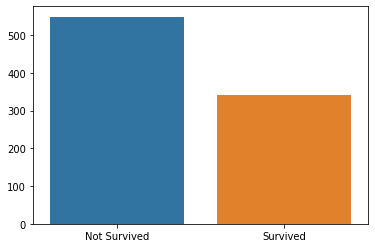

In [29]:
sns.barplot(x=['Not Survived', 'Survived'], y = imputed_df.Survived.value_counts().values)

In [30]:
over_sampler =  RandomOverSampler(random_state=42)
features, target = over_sampler.fit_resample(imputed_df.drop(columns=['Survived']), imputed_df.Survived)
features, target

(      Pclass  Sex       Age  SibSp  Parch       Fare  Embarked
 0        3.0  1.0  22.00000    1.0    0.0   7.250000       2.0
 1        1.0  0.0  38.00000    1.0    0.0  71.312500       0.0
 2        3.0  0.0  26.00000    0.0    0.0   7.925781       2.0
 3        1.0  0.0  35.00000    1.0    0.0  53.093750       2.0
 4        3.0  1.0  35.00000    0.0    0.0   8.046875       2.0
 ...      ...  ...       ...    ...    ...        ...       ...
 1093     3.0  1.0  29.00000    0.0    0.0   7.750000       1.0
 1094     1.0  0.0  21.00000    0.0    0.0  77.937500       2.0
 1095     1.0  1.0  42.40625    0.0    0.0  29.703125       0.0
 1096     1.0  0.0  30.00000    0.0    0.0  93.500000       2.0
 1097     1.0  1.0  48.00000    0.0    0.0  26.546875       2.0
 
 [1098 rows x 7 columns], 0       0.0
 1       1.0
 2       1.0
 3       1.0
 4       0.0
        ... 
 1093    1.0
 1094    1.0
 1095    1.0
 1096    1.0
 1097    1.0
 Name: Survived, Length: 1098, dtype: float16)

In [31]:
# check dataset is balanced on not
features['Survived'] =target
features.Survived.value_counts()

0.0    549
1.0    549
Name: Survived, dtype: int64

# EDA- Data Analysis

In [32]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1098 entries, 0 to 1097
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    1098 non-null   float16
 1   Sex       1098 non-null   float16
 2   Age       1098 non-null   float16
 3   SibSp     1098 non-null   float16
 4   Parch     1098 non-null   float16
 5   Fare      1098 non-null   float16
 6   Embarked  1098 non-null   float16
 7   Survived  1098 non-null   float16
dtypes: float16(8)
memory usage: 17.3 KB


In [33]:
features.describe().T

,count,mean,std,min,25%,50%,75%,max
Pclass,1098.0,2.250000,0.852539,1.000000,1.000000,3.0,3.000000,3.0
Sex,1098.0,0.587402,0.492432,0.000000,0.000000,1.0,1.000000,1.0
Age,1098.0,29.734375,13.554688,0.419922,21.000000,29.0,37.750000,80.0
SibSp,1098.0,0.518066,1.035156,0.000000,0.000000,0.0,1.000000,8.0
Parch,1098.0,0.390625,0.795898,0.000000,0.000000,0.0,1.000000,6.0
Fare,1098.0,34.750000,inf,0.000000,7.925781,15.5,34.585938,512.5
Embarked,1098.0,1.505859,0.812500,-1.000000,1.000000,2.0,2.000000,2.0
Survived,1098.0,0.500000,0.500000,0.000000,0.000000,0.5,1.000000,1.0


In [34]:
features.groupby(by='Sex').mean()

,Pclass,Age,SibSp,Parch,Fare,Embarked,Survived
Sex,,,,,,,
0.0,2.105469,27.56250,0.646973,0.596191,45.531250,1.386719,0.821289
1.0,2.349609,31.28125,0.427979,0.246460,27.140625,1.588867,0.274414


In [35]:
features.groupby(by='Survived').mean()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,,,,,,,
0.0,2.531250,0.852539,31.250000,0.553711,0.32959,22.12500,1.641602
1.0,1.966797,0.322510,28.234375,0.482666,0.45166,47.34375,1.370117


# Data Spliting

In [36]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(
    features.drop(columns=['Survived']), features.Survived, random_state=42, test_size=0.25
)

# Feature selection

In [37]:
features.drop(columns='Survived', inplace=True)

In [38]:
from sklearn.feature_selection import mutual_info_classif

In [39]:
scores = mutual_info_classif(xtrain, ytrain, n_neighbors=5, random_state=4)
scores

array([0.03605602, 0.1390393 , 0.08383518, 0.01700339, 0.02546877,
       0.16814703, 0.03494419])

In [40]:
scores = pd.DataFrame(scores, index=features.columns, columns=['scores', ])

In [41]:
scores = scores.sort_values(by='scores', ascending=False)
scores

,scores
Fare,0.168147
Sex,0.139039
Age,0.083835
Pclass,0.036056
Embarked,0.034944
Parch,0.025469
SibSp,0.017003


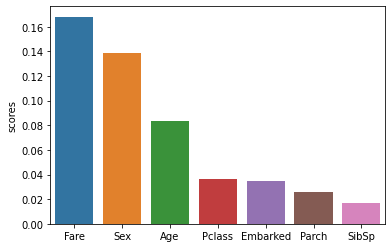

In [42]:
# barplot
sns.barplot(data=scores, x=scores.index, y='scores')

#Random Forest

In [43]:
from sklearn.ensemble import RandomForestClassifier

In [44]:
rf =  RandomForestClassifier()
rf.fit(xtrain[['Fare', 'Sex']], ytrain)

RandomForestClassifier()

In [45]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [46]:
ypred_rf = rf.predict(xtest[['Fare', 'Sex']])
cm_rf = confusion_matrix(ytest, ypred_rf)

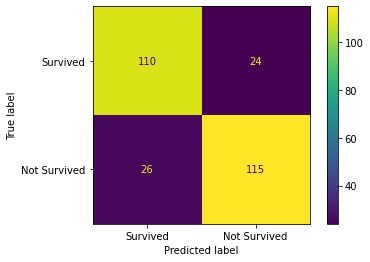

In [47]:
cm_rf_disp = ConfusionMatrixDisplay(cm_rf, display_labels=['Survived', 'Not Survived']) 
cm_rf_disp.plot()

In [48]:
accuracy_score_rf = accuracy_score(ytest, ypred_rf)
accuracy_score_rf

0.8181818181818182

Grid search for improving the score

In [49]:
RandomForestClassifier().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [50]:
params = {
 'bootstrap': [True, False],
 'criterion': ['gini', 'entropy'],
 'max_depth': np.arange(3, 9, 1),
 'max_features': ['auto', 'sqrt', 'log2'],
 'max_leaf_nodes': np.arange(25, 50, 5),
 'min_samples_split': np.arange(2, 20, 3),
 'n_estimators': [50, 100],
 'warm_start': [False, True]
 }

In [51]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [52]:
grid = RandomizedSearchCV(rf, param_distributions=params, cv=5, scoring='accuracy')
grid.fit(features[['Fare', 'Sex']], target)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': array([3, 4, 5, 6, 7, 8]),
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'max_leaf_nodes': array([25, 30, 35, 40, 45]),
                                        'min_samples_split': array([ 2,  5,  8, 11, 14, 17]),
                                        'n_estimators': [50, 100],
                                        'warm_start': [False, True]},
                   scoring='accuracy')

In [53]:
grid.best_estimator_

RandomForestClassifier(bootstrap=False, max_depth=6, max_features='sqrt',
                       max_leaf_nodes=40, n_estimators=50)

In [54]:
grid.best_score_

0.7878331257783312

Lets check the accuracy with grid score

In [55]:
rf_grid =  RandomForestClassifier(bootstrap=False, max_depth=6, max_features='log2',
                       max_leaf_nodes=30, n_estimators=50, warm_start=True)
rf_grid.fit(xtrain[['Fare', 'Sex']], ytrain)

RandomForestClassifier(bootstrap=False, max_depth=6, max_features='log2',
                       max_leaf_nodes=30, n_estimators=50, warm_start=True)

In [56]:
ypred_rf_grid = rf_grid.predict(xtest[['Fare', 'Sex']])
cm_rf_grid = confusion_matrix(ytest, ypred_rf_grid)

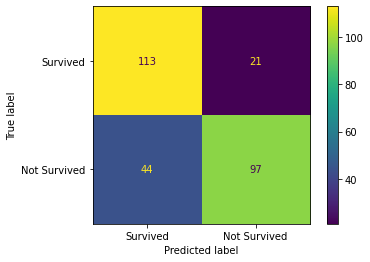

In [57]:
cm_rf_grid_disp = ConfusionMatrixDisplay(cm_rf_grid, display_labels=['Survived', 'Not Survived']) 
cm_rf_grid_disp.plot()

In [58]:
accuracy_score_rf_grid = accuracy_score(ytest, ypred_rf_grid)
accuracy_score_rf_grid

0.7636363636363637

ROC Curve & Accuracy

In [59]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [60]:
ypred_rf_prob = rf.predict_proba(xtest[['Fare', 'Sex']])

In [61]:
fpr, tpr, thresh = roc_curve(ytest, ypred_rf_prob[:,1])

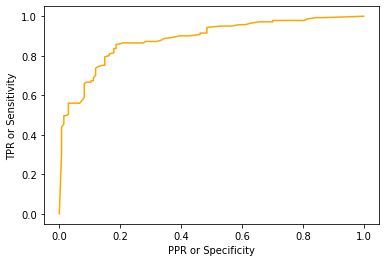

In [62]:
plt.plot(fpr, tpr, color='orange')
plt.ylabel('TPR or Sensitivity')
plt.xlabel('PPR or Specificity')
plt.show()


# Logistic Regression Model

In [89]:
from sklearn.linear_model import LogisticRegression

In [90]:
lr = LogisticRegression()
lr.fit(xtrain[['Fare', 'Sex']], ytrain)

LogisticRegression()

In [91]:
ypred_lr = lr.predict(xtest[['Fare', 'Sex']])
cm_lr = confusion_matrix(ytest, ypred_lr)

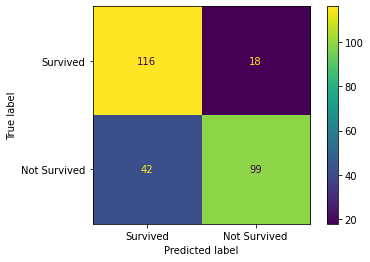

In [92]:
cm_lr_disp = ConfusionMatrixDisplay(cm_lr, display_labels=['Survived', 'Not Survived']) 
cm_lr_disp.plot()

In [93]:
accuracy_score_lr = accuracy_score(ytest, ypred_lr)
accuracy_score_lr

0.7818181818181819

In [108]:
from sklearn.metrics import (
    accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay,
    precision_score, recall_score, classification_report)

In [109]:
print(classification_report(ypred_lr, ytest.values))

              precision    recall  f1-score   support

         0.0       0.87      0.73      0.79       158
         1.0       0.70      0.85      0.77       117

    accuracy                           0.78       275
   macro avg       0.78      0.79      0.78       275
weighted avg       0.80      0.78      0.78       275



Grid search

In [94]:
LogisticRegression().get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [95]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [96]:
params = {
 'C': [1.0, 2, 5, 9],
 'max_iter': [100, 500],
 'penalty': ['l2',],
 'solver': ['lbfgs', 'newton-cg', 'saga','liblinear']
 }

In [97]:
grid = RandomizedSearchCV(lr, param_distributions=params, cv=5, scoring='accuracy')
grid.fit(features[['Fare', 'Sex']], target)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': [1.0, 2, 5, 9],
                                        'max_iter': [100, 500],
                                        'penalty': ['l2'],
                                        'solver': ['lbfgs', 'newton-cg', 'saga',
                                                   'liblinear']},
                   scoring='accuracy')

In [98]:
grid.best_estimator_

LogisticRegression(max_iter=500, solver='liblinear')

In [99]:
lr_grid = grid.best_estimator_
lr_grid

LogisticRegression(max_iter=500, solver='liblinear')

In [100]:
grid.best_score_

0.7641220423412205

In [101]:
ypred_lr_grid = lr_grid.predict(xtest[['Fare', 'Sex']])
cm_lr_grid = confusion_matrix(ytest, ypred_lr_grid)

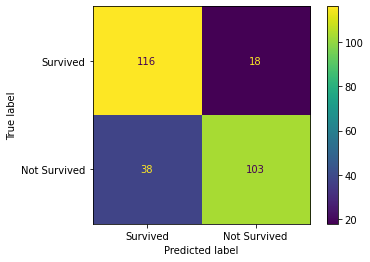

In [102]:
cm_lr_grid_disp = ConfusionMatrixDisplay(cm_lr_grid, display_labels=['Survived', 'Not Survived']) 
cm_lr_grid_disp.plot()

In [104]:
accuracy_score_lr_grid = accuracy_score(ytest, ypred_lr_grid)
accuracy_score_lr_grid

0.7963636363636364

In [106]:
from sklearn.metrics import (
    accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay,
    precision_score, recall_score, classification_report)

In [107]:
print(classification_report(ypred_lr_grid, ytest.values))

              precision    recall  f1-score   support

         0.0       0.87      0.75      0.81       154
         1.0       0.73      0.85      0.79       121

    accuracy                           0.80       275
   macro avg       0.80      0.80      0.80       275
weighted avg       0.81      0.80      0.80       275



ROC Curve & Accuracy

In [110]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [112]:
ypred_lr_prob = lr.predict_proba(xtest[['Fare', 'Sex']])
fpr, tpr, thresh = roc_curve(ytest, ypred_lr_prob[:,1])

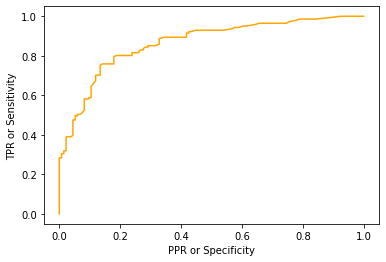

In [113]:
plt.plot(fpr, tpr, color='orange')
plt.ylabel('TPR or Sensitivity')
plt.xlabel('PPR or Specificity')
plt.show()

# KNN Model

This tutorial is designed by khalid Hossen